In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import sympy
from sympy import *
x, y, z = symbols('x y z')

Quantidade pontos usados no ajuste: 6
x0=0
y0=0
x1=0.2618
y1=1.0353
x2=0.5234
y2=2
x3=0.7854
y3=2.8284
x4=1.0472
y4=3.4641
x5=1.309
y5=3.8637

[array([0.    , 1.0353, 2.    , 2.8284, 3.4641, 3.8637]), [3.9545454545454555, 3.6876911314984704, 3.1618320610687016, 2.4281894576012246, 1.526355996944232], [-0.5098477704374954, -1.004314496619115, -1.4006158905450117, -1.7223710096581222], [-0.6295731171143617, -0.504585426439899, -0.409566088484102], [0.11935417367691244, 0.09073657176833179], [-0.021862186331994386]]

coeficientes 0: 0.0
coeficientes 1: 3.9545454545454555
coeficientes 2: -0.5098477704374954
coeficientes 3: -0.6295731171143617
coeficientes 4: 0.11935417367691244
coeficientes 5: -0.021862186331994386

Polinomio Interpolador de grau 0: 0.0
P0: 0.0
Polinomio Interpolador de grau 1: 3.95454545454546*x
P1: 3.95454545454546*x
Polinomio Interpolador de grau 2: -0.509847770437495*x*(x - 0.2618) + 3.95454545454546*x
P2: -0.509847770437495*x**2 + 4.08802360084599*x
Polinomio Interpol

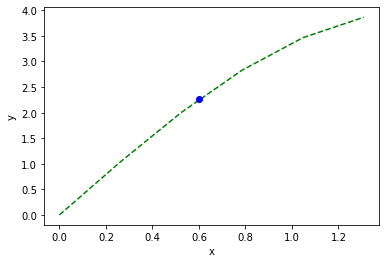

In [3]:
pontos = int(input('Quantidade pontos usados no ajuste: ')) # quantidade de pontos para o ajuste

#Vetores X e Y
X, Y =np.zeros(pontos), np.zeros(pontos)
for i in range(pontos):
    X[i]=float(input('x'+str(i)+'='))
    Y[i]=float(input('y'+str(i)+'='))
print()    
T = []
T.append(Y) #primeira coluna da tabela T são os valores de Y

passo=1
for j in range(pontos -1):
    ordem=[]
    for i in range(len(T[j])-1):
        dd = (T[j][i+1] - T[j][i])/(X[i+passo]-X[i])
        ordem.append(dd)
    T.append(ordem)
    passo +=1
print(T)
print()

# ordem da tabela
for i in range(len(T)):
    print('coeficientes %d:'%i, T[i][0])
print()

#polinômio interpolador de Newton
aprox = 0
grau = 0
for i in range(len(T)):
    fator = T[i][0]
    for j in range(grau):
        fator *=(x - X[j])
    grau +=1
    aprox +=fator
    print('Polinomio Interpolador de grau %d:'%i, aprox)
    print('P%d:'%i, sympy.expand(aprox))
print()

# define o ponto da interpolação desejado
n = float(input('Ponto de interpolacao: ')) 
#calculo do grau e da aproximação
aprox = 0
grau = 0
R=[]
for i in range(len(T)):
    fator = T[i][0]
    for j in range(grau):
        fator *=(n - X[j])
    grau +=1
    aprox +=fator
    R.append(aprox)
    print('f(%f) grau %d ='%(n,i), aprox)

#Demosntração do Calculo do erro de aproximação
ERx=[]
erro = 0
base = 1
for i in range(len(X)-1):
    base *=np.abs(x-X[i])
    fator = max(np.abs(T[i+1]))
    erro = base*fator
    ERx.append(erro)
    print('Erro grau %d'%i, ERx[i])


#Calculo do erro de aproximação
ER=[]
erro = 0
base = 1
for i in range(len(X)-1):
    base *=np.abs(n-X[i])
    fator = max(np.abs(T[i+1]))
    erro = base*fator
    ER.append(erro)
    print('Erro grau %d'%i, ER[i])


#Printando o Gráfico
plt.plot(X,Y,'g--')
plt.plot(n,aprox,'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.show()